# Logistic SVM: Final model

This notebook features the most interesting model using SVM. 

In [2]:
%run notebook_utils.py

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

In [4]:
import matplotlib

# set big font in plots
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [5]:
%cd ..
from langid import sanitize, np_sanitize
%cd -

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


## Data loading

In [6]:
X, y = load_data()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

# Model training

In [7]:
vect_options = dict(
    analyzer='char', 
    max_features=10000, 
    ngram_range=(3, 3),
    sublinear_tf=True, 
    use_idf=True
)

svm_options = dict(C=1, kernel='linear')

pipe = Pipeline([
    ('vect', TfidfVectorizer(**vect_options)),
    ('clf', SVC(**svm_options))
])

pipe.fit(np_sanitize(X_train), y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(3, 3), norm='l2', preprocessor=None, smooth_idf=True,
 ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

# Model evaluation

TEST SET
averall accuracy: 0.9945
             precision    recall  f1-score   support

         de     0.9952    0.9884    0.9918      1462
         fr     0.9993    0.9980    0.9986      1468
         en     0.9980    0.9954    0.9967      1538
         it     0.9986    0.9966    0.9976      1482
         sg     0.9808    0.9937    0.9872      1438

avg / total     0.9945    0.9945    0.9945      7388



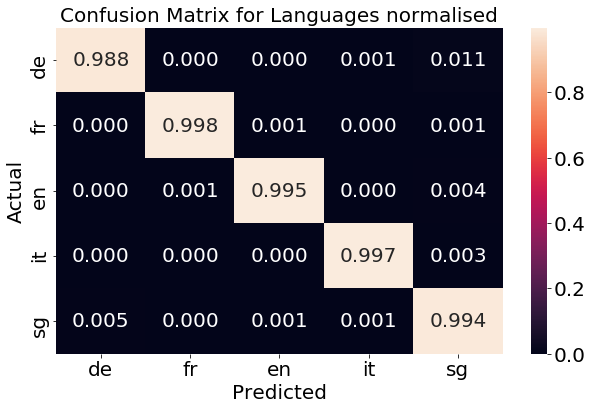

SMS RECALL
total samples    10692
total errors        85 (0.79%)
---------------------------------
languages detected
    de       75
    fr        3
    en        6
    it        1
    sg    10607
SMS ANY
averall accuracy: 0.8706
             precision    recall  f1-score   support

         de     1.0000    0.7512    0.8580       201
         fr     1.0000    0.9353    0.9666       201
         en     1.0000    0.7413    0.8514       201
         it     0.9947    0.9254    0.9588       201
         sg     0.6091    1.0000    0.7571       201

avg / total     0.9207    0.8706    0.8784      1005



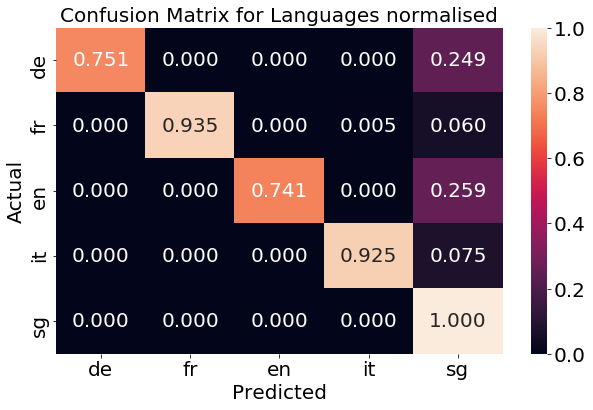



VALIDATION SET
averall accuracy: 0.9861
             precision    recall  f1-score   support

         de     0.9461    0.9946    0.9698      2613
         fr     0.9992    0.9989    0.9990      2613
         en     0.9985    0.9977    0.9981      2613
         it     0.9977    0.9985    0.9981      2613
         sg     0.9911    0.9407    0.9652      2613

avg / total     0.9865    0.9861    0.9860     13065



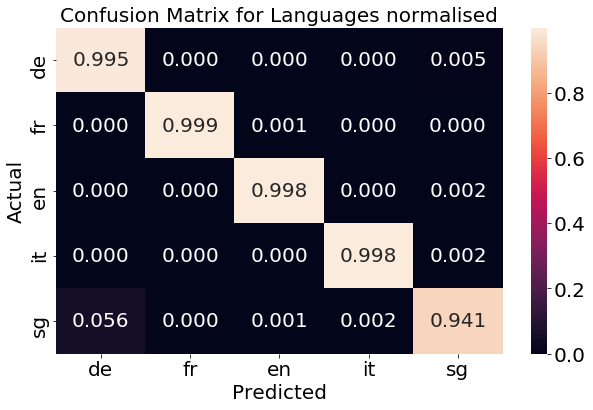

In [9]:
print("TEST SET")
print("========")
y_pred = pipe.predict(np_sanitize(X_test))
print("averall accuracy: %.4f" % metrics.accuracy_score(y_test, y_pred))
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")

test_recall_with_sms(pipe)


print("\n\nSMS ANY")
print("==========")
y_sms_any_pred = pipe.predict(np_sanitize(sms_any_X))
print("averall accuracy: %.4f" % metrics.accuracy_score(sms_any_y, y_sms_any_pred))
print_results(sms_any_y, y_sms_any_pred)
plot_confusion_matrix(sms_any_y, y_sms_any_pred, normalised=True)

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = pipe.predict(np_sanitize(X_valid))
print("averall accuracy: %.4f" % metrics.accuracy_score(y_valid, y_valid_pred))
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True)

# Model export

In [30]:
import pickle

filename = "Sanitize-TfidfVec_feat10000_trigrams-SVM_linear_C1.pickle"
with open(filename, 'wb') as f: pickle.dump(pipe, f)